<a href="https://colab.research.google.com/github/snsamarasekara/Data-Analysis-Projects/blob/main/Sales_Forecasting_Model_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import math
import matplotlib as mpl

In [9]:
df = pd.read_csv("/content/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
# date to datetime conversion
df['Date'] =  pd.to_datetime(df['Date'])


In [11]:
# checking for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
# Splitting Date into columns Day, Month, and Year
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


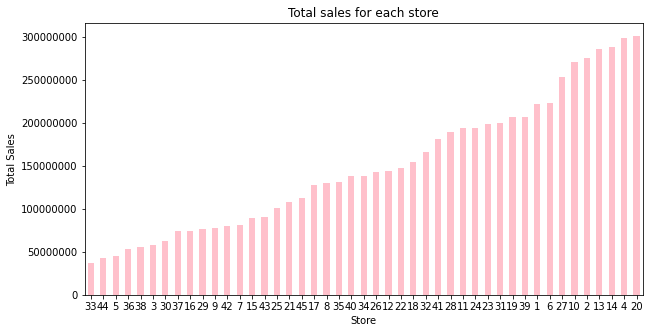

In [13]:
# Data analysis 
# The store having max and min sales
plt.figure(figsize=(10,5))
# first, add weekly sales of each store then sort according to sales
total_sales_each_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_each_store_array = np.array(total_sales_each_store) # convert to array
ax = total_sales_each_store.plot(kind='bar',color='pink');
#plot
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');
 
 # The store with lowest sales is number 33 and highest is number 20

In [14]:
# store with the maximum deviation (sd)
std1 = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store which has the maximum standard deviation is "+str(std1.head(1).index[0])+" with {0:.0f} $".format(std1.head(1).Weekly_Sales[std1.head(1).index[0]]))

The store which has the maximum standard deviation is 14 with 317570 $


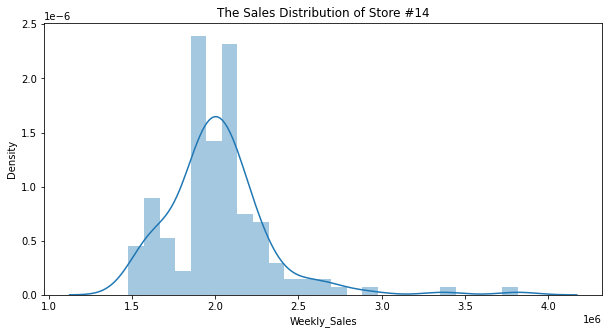

In [15]:
#plot
plt.figure(figsize=(10,5))
sns.distplot(df[df['Store'] == std1.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(std1.head(1).index[0]));

In [11]:
# store with good quarterly growth rate 
#print('Store with the good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

In [16]:
df_stores = pd.read_csv('/content/stores.csv') #stores data
df_train = pd.read_csv('/content/train.csv') # train set
df_features = pd.read_csv('/content/features.csv') 

In [17]:
# Merge the data tables
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [18]:
#clean data
df.drop(['IsHoliday_y'], axis=1,inplace=True) # remove duplicates
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename 

In [19]:
#understanding the data
# number of different stores
df['Store'].nunique()

45

In [20]:
# Number of departments
df['Dept'].nunique()

81

In [21]:
# average sales of each store and department
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
store_dept_table

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [22]:
# removing negative values for sales
df.loc[df['Weekly_Sales']<=0]
df = df.loc[df['Weekly_Sales'] > 0]
df.shape # new data shape

(420212, 16)

In [23]:
# different holidays and how it affects sales
# Super bowl dates (train set)
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False
# Labor day dates
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False
# Thanksgiving 
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False
#Christmas 
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

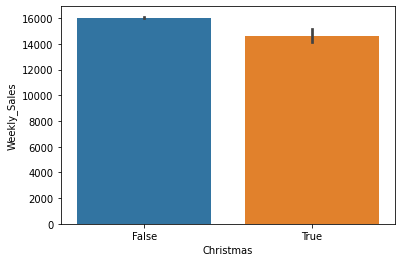

In [24]:
#plotting to see if there's an affact on sales
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday sales (No increase in sales in this week)

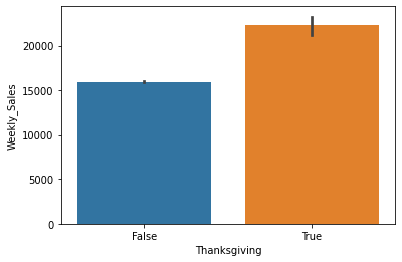

In [25]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving (there's an obvious increase in sales during the holiday week)

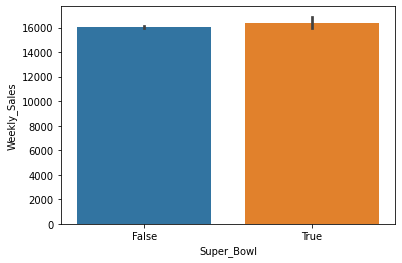

In [32]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl (slight increase in sales)

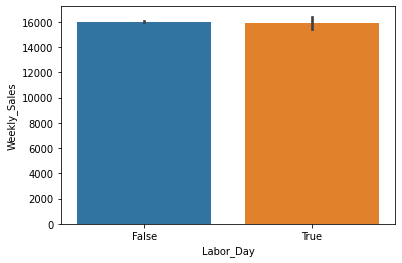

In [33]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday (no increment in sales)

In [26]:
# checking the store type and effct on each holiday on them
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for  all 3 types on Christmas 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [27]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  #  on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [36]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean() # on thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [37]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean() # on super bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

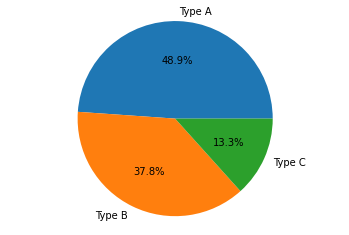

In [38]:
# how many of each store type 
data = [48.88, 37.77 , 13.33 ]  #percentages
labels = 'Type A','Type B', 'Type C' # labels
plt.pie(data,labels=labels,autopct='%1.1f%%', textprops={'fontsize': 10}) #plot pie chart
plt.axis('equal')
mpl.rcParams.update({'font.size': 10})

plt.show() # from the plot around half of stores are type A

In [39]:
# code from matplotlib documentation and changed accorsing to the data
# Plot avg weekly sales according to holidays
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

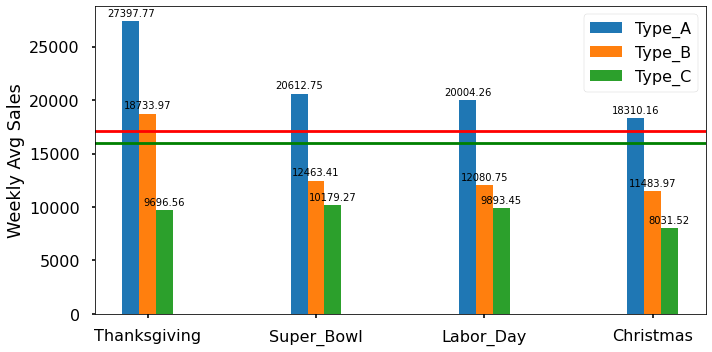

In [41]:
x = np.arange(len(labels)) 
width = 0.10

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):

   for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='red') # holiday sales avg
plt.axhline(y=15952.82,color='green') # normaly sales avg (non holiday)

fig.tight_layout()

plt.show() # from the graph : Thanksgiving holiday have the highest sales and store type A

In [42]:
# checking for nulls before marksown analysis
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [43]:
df = df.fillna(0) # replace nulls with 0
df.isna().sum() 

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [44]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


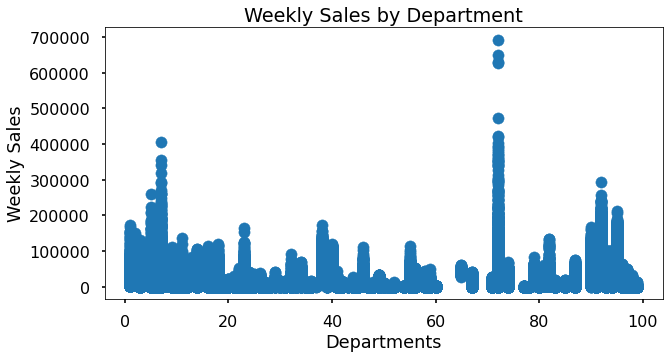

In [46]:
# weekly sales by department 
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(10,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

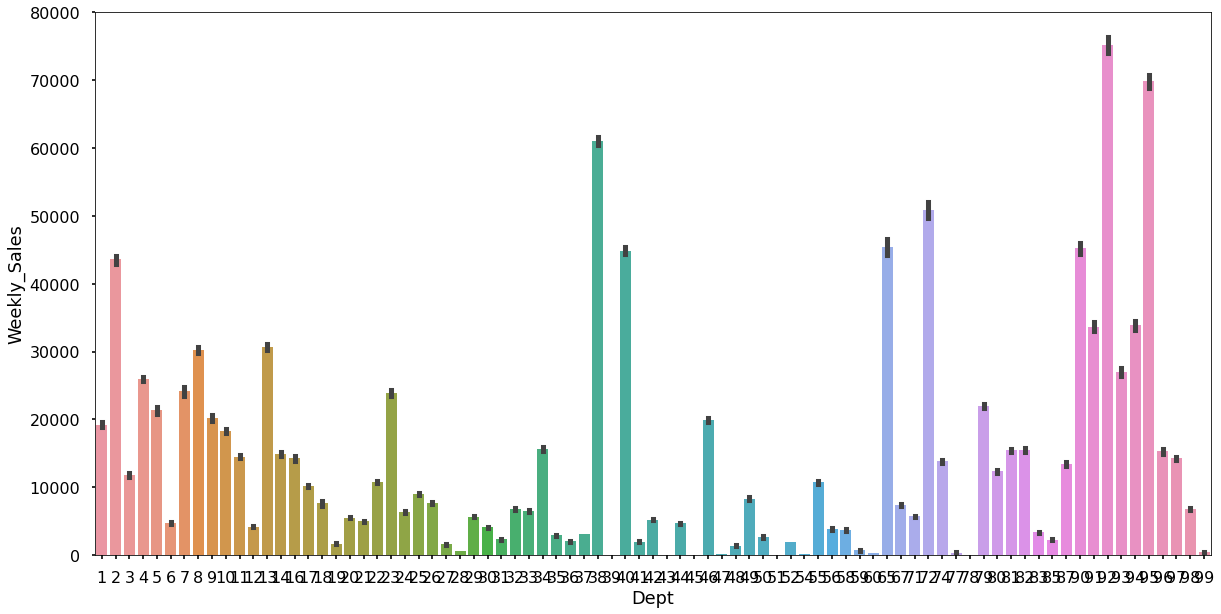

In [47]:
plt.figure(figsize=(20,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

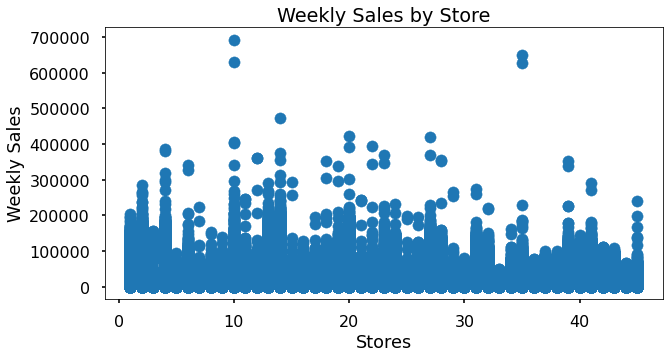

In [48]:
#weekly sales by store
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(10,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()


In [49]:
df["Date"] = pd.to_datetime(df["Date"]) # datetime conversion 
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year
df.groupby('month')['Weekly_Sales'].mean() # sales for each month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [50]:
df.groupby('year')['Weekly_Sales'].mean() # years and sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

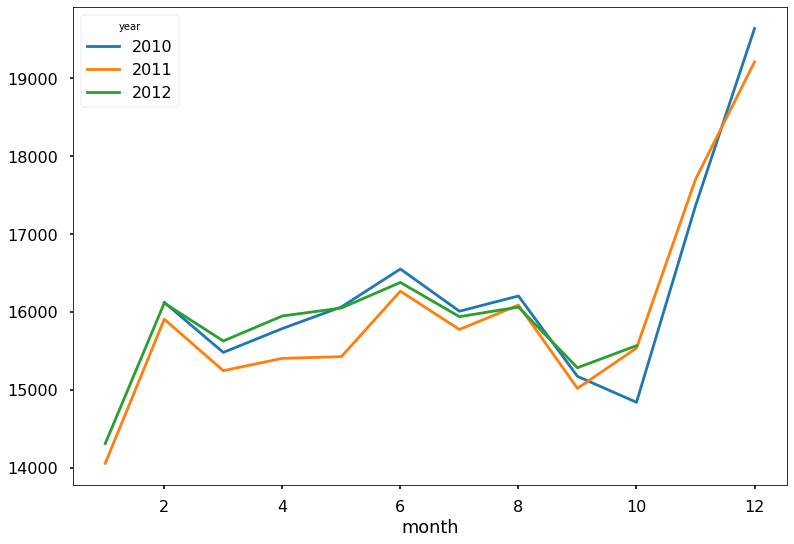

In [51]:
#plot to see the sales changes over time
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot() # 2011 has the lower sales compared to other years

**Model development :Random Forrest Model **

In [52]:
# import libraries
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor


In [54]:
# data encoding 
# converting text to numbers for model purposes
df_encoded = df.copy() 
type_group = {'A':1, 'B': 2, 'C': 3}  # A,B,C store types to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # change T,F to 0-1
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) 
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) 
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) 
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) 
df_new = df_encoded.copy() 

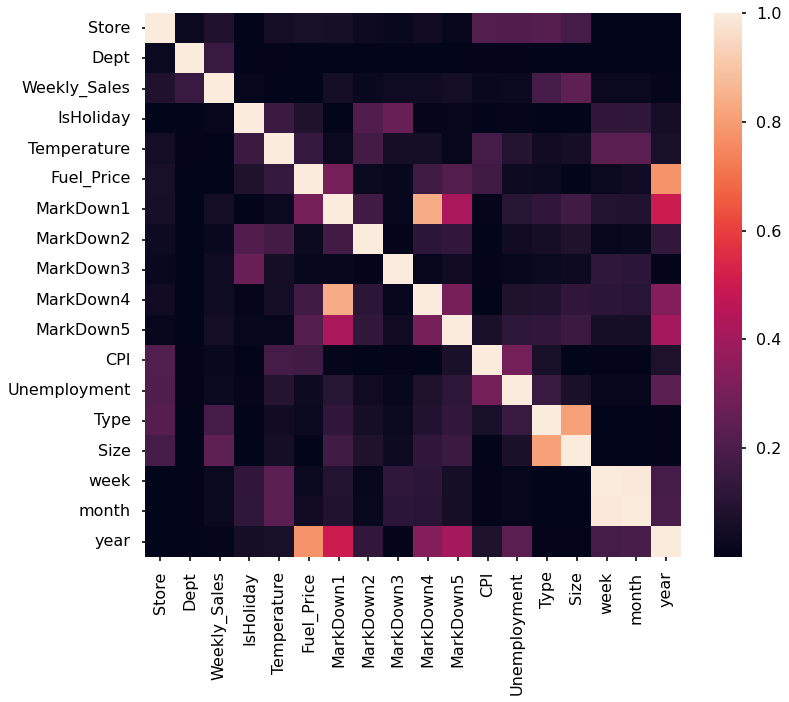

In [57]:
# checking the correlations between features
#drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
#df_new.drop(drop_col, axis=1, inplace=True) 
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())  # heatmap
plt.show() # this shows Temperature, unemployment, CPI have no significant correlaiton with weekly sales and Markdown 4 and 5 highly correlated with Markdown 1

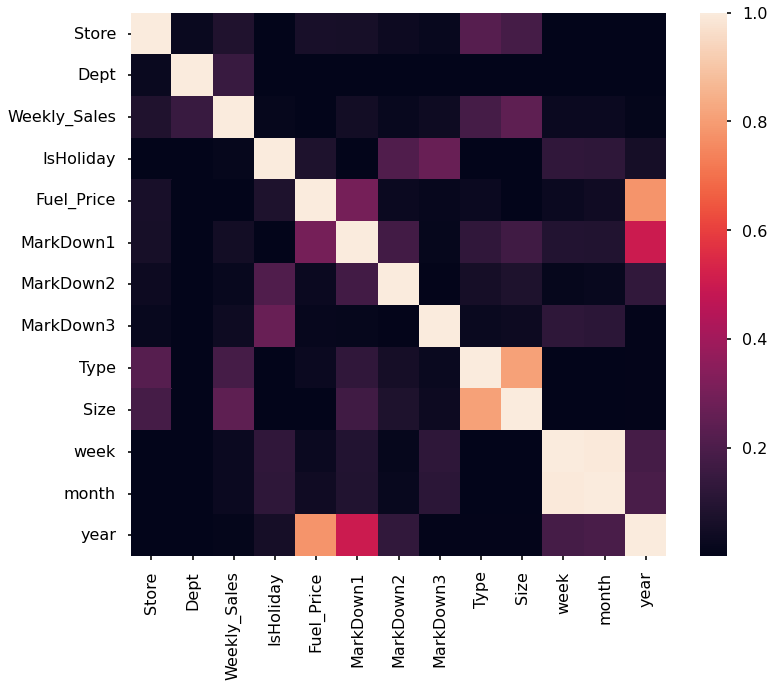

In [58]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True)
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs()) 
plt.show() # size and type have higher correlation with sales and department and store are correlated with sales 

In [59]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

In [60]:
# train and test splitting
train_data = df_new[:int(0.7*(len(df_new)))] # train set
test_data = df_new[int(0.7*(len(df_new))):] # test set

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] 

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [61]:
X = df_new[used_cols]

In [62]:
X_train = X_train.drop(['Date'], axis=1) # drop date from train and test
X_test = X_test.drop(['Date'], axis=1) 

In [65]:

train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] 

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [66]:
X_enc = df_encoded[used_cols1] 
X_enc = X_enc.drop(['Date'], axis=1) 
X_train_enc = X_train_enc.drop(['Date'], axis=1) 
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [71]:
from sklearn.preprocessing import RobustScaler

In [72]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

In [73]:
wmae_test(y_test_enc, y_pred_test_enc) 

2450.1012493925496

Feat_ranking:
1. feature 1 (0.743136)
2. feature 13 (0.075801)
3. feature 12 (0.043810)
4. feature 0 (0.031172)
5. feature 10 (0.028007)
6. feature 11 (0.017039)
7. feature 18 (0.012315)
8. feature 3 (0.011079)
9. feature 4 (0.009879)
10. feature 19 (0.005534)
11. feature 7 (0.004481)
12. feature 9 (0.003979)
13. feature 5 (0.003461)
14. feature 8 (0.003315)
15. feature 6 (0.002381)
16. feature 16 (0.001363)
17. feature 20 (0.001200)
18. feature 2 (0.000879)
19. feature 17 (0.000597)
20. feature 14 (0.000290)
21. feature 15 (0.000283)


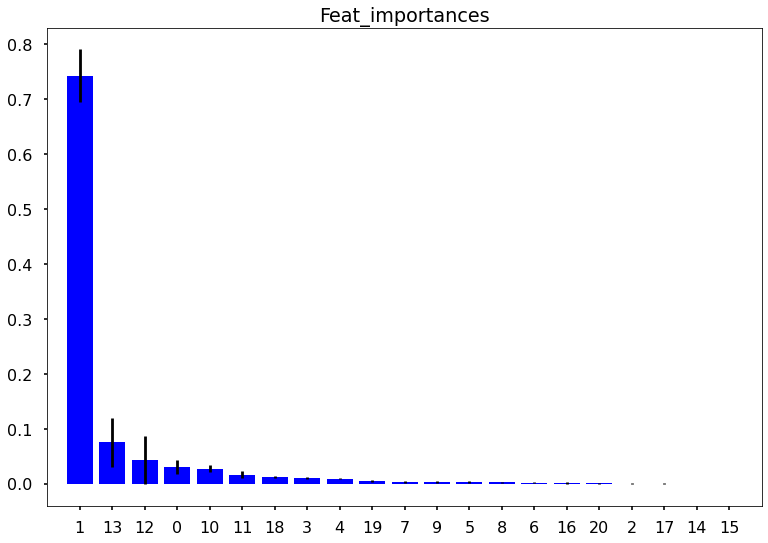

In [74]:
# checking feature importance to try further model training 
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# feature rank
print("Feat_ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# feature importance of Forets 
plt.figure()
plt.title("Feat_importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="blue", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

In [75]:
df_encoded_new = df_encoded.copy() 
df_encoded_new.drop(drop_col, axis=1, inplace=True)

In [76]:
# re-modeling according to above findings
#split
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # drop price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [77]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)


y_pred_enc = pipe.predict(X_train_enc1)


y_pred_test_enc = pipe.predict(X_test_enc1)

In [78]:
pipe.score(X_test_enc1,y_test_enc1) # 73.9% prediction accuracy : needs imporvement

0.7397036882771106

In [79]:
# re-model dropping month 
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)

train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] 

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [80]:
pipe = make_pipeline(scaler,rf)
pipe.fit(X_train_enc2, y_train_enc2)
y_pred_enc = pipe.predict(X_train_enc2)
y_pred_test_enc = pipe.predict(X_test_enc2)
wmae_test(y_test_enc2, y_pred_test_enc)

2093.074731200826

In [ ]:
# with above modeling the best results shown after feature selection 

**Time Series Modeling : ARIMA**

In [82]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 47.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 5.0 MB/s 


In [6]:
# Importing libraries
from statsmodels.tsa.stattools import adfuller

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from pandas.plotting import autocorrelation_plot as auto_corr
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, Normal

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn import preprocessing

import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
from datetime import datetime
from datetime import timedelta
import math


In [30]:
df["Date"] = pd.to_datetime(df["Date"]) 
df.set_index('Date', inplace=True) #set date as index

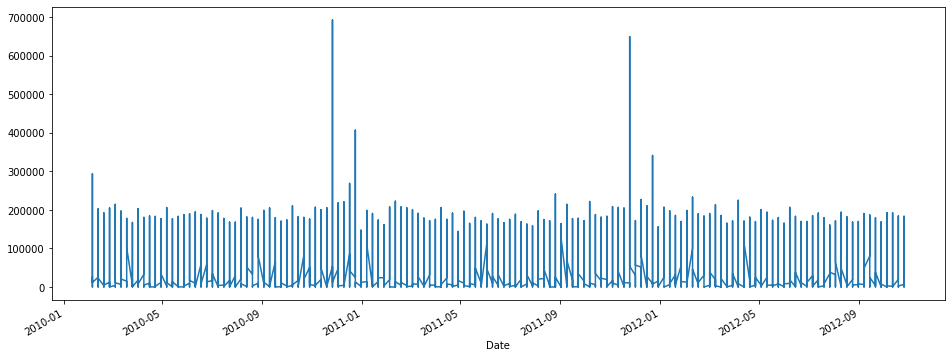

In [31]:
plt.figure(figsize=(16,6)) # sales with time
df['Weekly_Sales'].plot()
plt.show()

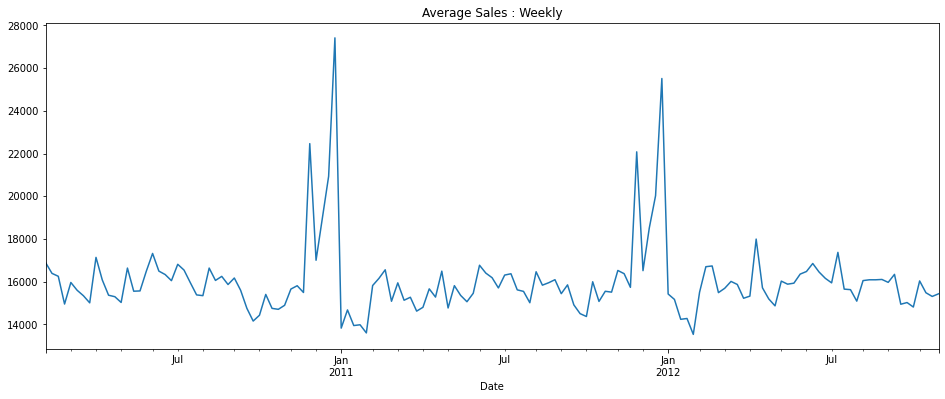

In [33]:
df_week = df.resample('W').mean() # Avg. sales with time 
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales : Weekly')
plt.show()

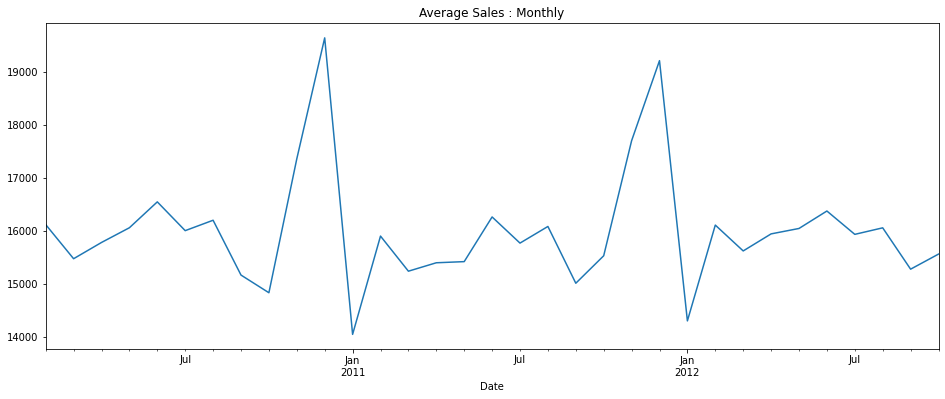

In [34]:
df_month = df.resample('MS').mean() # avg sales monthly 
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales : Monthly')
plt.show()


In [36]:
#test train split
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 14)
Test: (43, 14)


In [38]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] 
X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]
#train_data['Weekly_Sales'].plot(figsize=(10,5), title= 'Weekly_Sales', fontsize=10)
#test_data['Weekly_Sales'].plot(figsize=(10,5), title= 'Weekly_Sales', fontsize=10)
#plt.show() # train data in blue and test data in orange


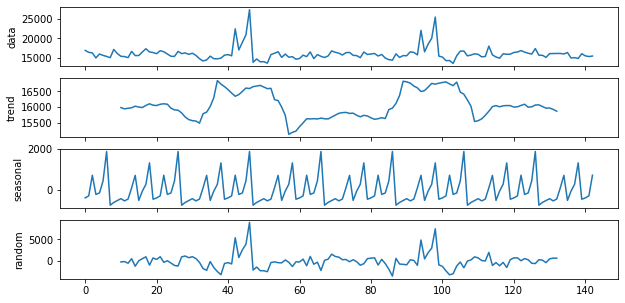

In [39]:
# check the sales by seasons by decomposing weekly data
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)  
decomposed_plot(decomposed, figure_kwargs={'figsize': (10, 5)})
plt.show()

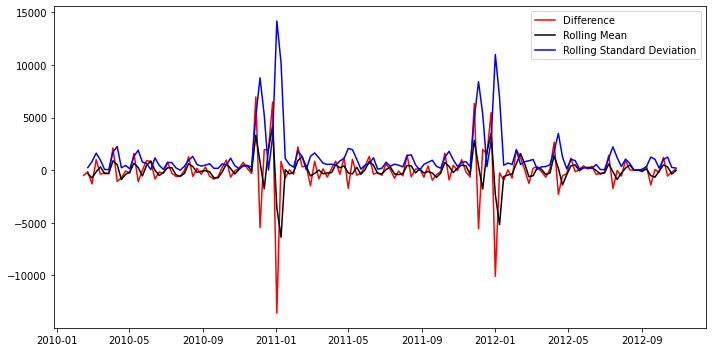

In [40]:
# making the data more stationary
#1. Difference
df_week_diff = df_week['Weekly_Sales'].diff().dropna()
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_week_diff, color='red',label='Difference')
ax.plot(diff_roll_mean, color='black', label='Rolling Mean')
ax.plot(diff_roll_std, color='blue', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

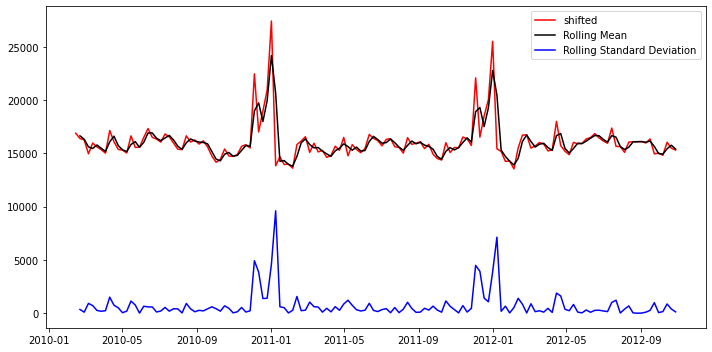

In [42]:
#2. Shift
df_week_lag = df_week['Weekly_Sales'].shift().dropna()  
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_week_lag, color='red',label='shifted')
ax.plot(lag_roll_mean, color='black', label='Rolling Mean')
ax.plot(lag_roll_std, color='blue', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()


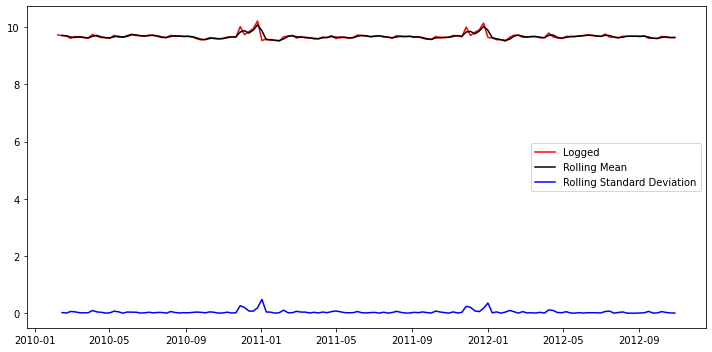

In [43]:
#3. Log
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() 
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(logged_week, color='red',label='Logged')
ax.plot(log_roll_mean, color='black', label='Rolling Mean')
ax.plot(log_roll_std, color='blue', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()


In [44]:
# Auto ARIMA Model
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=1.44 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

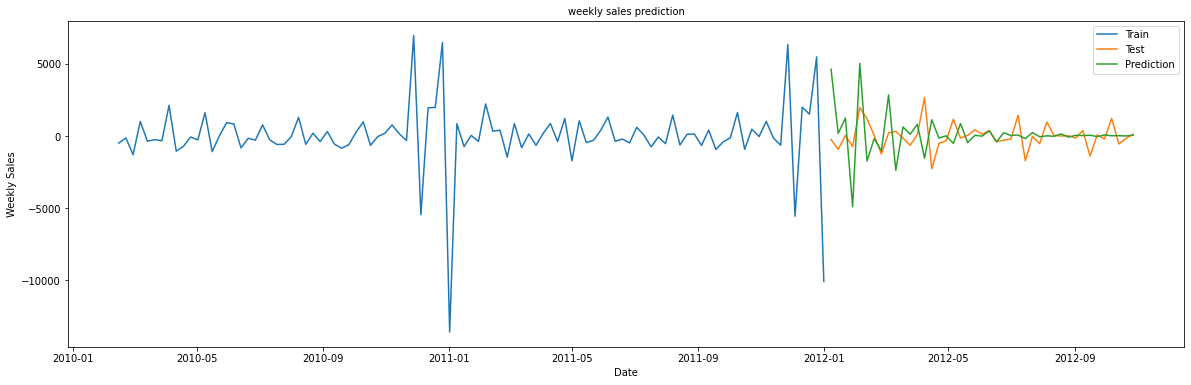

In [46]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('weekly sales prediction', fontsize=10)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Weekly Sales', fontsize=10)
plt.show()
